In [117]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from scipy.special import expit  # For the sigmoid function
import time

# Set the values of m, learning rate, and number of iterations
m_values = [50, 100, 150, 200, 250]
num_iterations = 10
learning_rate = 0.01    

# define sigmoid
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Problem 1
## Dataset Generation

Write a function to **generate a training set** of size $m$
- randomly generate a weight vector $w \in \mathbb{R}^{10}$, normalize length
- generate a training set $\{(x_i , y_i)\}$ of size m
  - $x_i$: random vector in $\mathbb{R}^{10}$ from $\textbf{N}(0, I)$
  - $y_i$: $\{0, +1\}$ with $P[y = +1] = \sigma(w \cdot x_i)$ and $P[y = 0] = 1 - \sigma(w \cdot x_i)$

In [118]:
def generate_data(m):
    # returns the true w as well as X, Y data
    """
      Generates a training set of size m according to the specified conditions.

      Args:
        m: The size of the training set.

      Returns:
        A tuple (X, y) where X is the matrix of features (m x 10) and y is the vector of labels (m,).
    """

    # (a) Generate the weight vector w*
    w_star = np.random.randn(10)  # Generate from distributed standard normal (#1ai requirement in HW2 programming handout)
    w_star /= np.linalg.norm(w_star)  # Normalize to have unit Euclidean norm (#1aii requirement in HW2 programming handout)

    # print(w_star)

    # (b) Generate the training set
    X = np.random.randn(m, 10)  # Features from distributed standard normal (1bi requirement in HW2 programming handout)
    y = np.zeros(m)  # Initialize labels


    for i in range(m):
        y[i] = 1 if np.random.rand() <= expit(w_star.dot(X[i])) else 0  # Generate labels using GenLabel function.
        # print(w_star.dot(X[i]), y[i])
    return X, y, w_star

    # Example usage:
    # X, y = generate_data(10)
    # print(X.shape, y.shape)

## Algorithm 1: logistic regression

The goal is to learn $w$.  Algorithm 1 is logistic
  regression (you may use the built-in method LogisticRegression for this. Use max_iter=1000).

In [119]:
def logistic_regression (x, y):
    # Load the generated data
    # X, y = generate_data(1000)  # Assuming you have the previous function

    # Create and train the Logistic Regression model
    model = LogisticRegression(solver='lbfgs', max_iter=1000)
    model.fit(X, y)

    # Make predictions on new data
    # new_X = np.random.randn(10)  # New data example
    # prediction = model.predict([new_X])[0]
    # print(f"Predicted label for new data: {prediction}")

    # Get model weights and bias
    w_prime = model.coef_[0]
    # bias = model.intercept_[0]
    # print(f"Model weights: {w_prime}")
    # print(f"Model bias: {bias}")
    return w_prime

## Algorithm 2: gradient descent with square loss

Define square loss as
$$L_i(w^{(t)}) = \frac{1}{2} \left( \sigma(w^{(t)} \cdot x) - y_i \right)^2$$

  Algorithm 2 is
  gradient descent with respect to square loss (code this
  up yourself -- run for 1000 iterations, use step size eta = 0.01).

In [147]:


""""""
def gradient_descent(x, y, learning_rate = 0.01, max_iter=1000):      # learning rate eta = 0.01, number of iterations = 1000
    # Initialize the weight vector w' with zeros or random values
    w_prime = np.zeros(x.shape[1])
    
    # Perform gradient descent
    for i in range(num_iterations):
        # Calculate the predicted labels
        predictions = sigmoid(np.dot(x, w_prime))
        
        # Calculate the gradient
        gradient = np.dot(x.T, predictions - y) / len(y)
        
        # Update the weight vector
        w_prime = w_prime - learning_rate * gradient
    
    return w_prime
""""""

def gradient_descent(X, y, learning_rate = 0.01, max_iter=10):
  """
  Performs  gradient descent and square loss.

  Args:
    X: The training features (m x n matrix).
    y: The training labels (m-dimensional vector).
    eta: The learning rate.
    num_iters: The number of iterations for gradient descent.

  Returns:
    w: The trained weight vector.
  """
  m, n = X.shape
  # w = np.random.randn(n)
  w_prime = np.zeros(n) # initialize weights to zero
  
  print(X.shape, w_prime.shape)
  
  for i in range(num_iterations):
    predictions = sigmoid(X.dot(w_prime))
    print(X.shape, w_prime.shape, predictions.shape)
    # predictions = X.dot(w) # Linear model prediction
    errors = predictions - y
    gradient = (1/m) * X.T.dot(errors)
    w_prime -= learning_rate * gradient
  return w_prime

## Algorithm 3: stochastic gradient descent with square loss
Similar to gradient descent, except we use the gradient at a single random training point every iteration.

In [148]:
def stochastic_gradient_descent(x, y, learning_rate, max_iter):
    # Initialize the weight vector w' with zeros or random values
    w_prime = np.zeros(x.shape[1])
    
    # Perform stochastic gradient descent
    for i in range(num_iterations):
        # Randomly select one data point
        random_index = np.random.randint(len(y))
        
        # Calculate the predicted label
        prediction = sigmoid(np.dot(x[random_index], w_prime))
        
        # Calculate the gradient using the selected data point
        gradient = np.dot(x[random_index].T, prediction - y[random_index])
        
        # Update the weight vector
        w_prime = w_prime - learning_rate * gradient
    
    return w_prime

## Evaluation

Measure error $\|w - \hat{w}\|_2$ for each method at different sample size. For any
  fixed value of $m$, choose many different $w$'s and average the
  values $\|w - 
  \hat{w}\|_2$ for Algorithms 1, 2 and 3.  Plot the results
  for for each algorithm as you make $m$ large (use $m=50, 100, 150, 200, 250$).
  Also record, for each algorithm, the time taken to run the overall experiment.

In [153]:
# Initialize lists to store results
algorithm_distances = []
algorithm_times = []
algorithm_w_star = []
algorithm_w_prime = []

# Repeat the experiment for each algorithm
for algorithm in [logistic_regression, lambda x, y:gradient_descent (x, y, learning_rate = 0.01, max_iter=1000), lambda x, y: stochastic_gradient_descent(x,y, learning_rate=0.01, max_iter=1000)]:
    distances = []
    times = []
    w_star_list = []
    w_prime_list = []
    average_w_star = []
    average_w_prime = []
    average_distance = []
    
    for m in m_values:
        start_time = time.time()
        
        for _ in range(num_iterations):
            # Generate fresh w* and training data
            # generate_data (m)
            w_star = np.random.normal(0, 1, size=(10,))
            w_star_normalized = w_star / np.linalg.norm(w_star)
            #x = np.random.normal(0, 1, size=(m, 10))
            #y = np.array([gen_label(xi) for xi in x])

             # (b) Generate the training set
            X = np.random.randn(m, 10)  # Features from distributed standard normal (1bi requirement in HW2 programming handout)
            y = np.zeros(m)  # Initialize labels


            for i in range(m):
                y[i] = 1 if np.random.rand() <= expit(w_star.dot(X[i])) else 0  # Generate labels using GenLabel function. <expit> is the sigmoid function.
            # print(w_star.dot(X[i]), y[i])
            #return X, y, w_star
            
            # Train the algorithm and obtain w'
            w_prime = algorithm(x, y)
            
            # Calculate the Euclidean distance between w* and w'
            distance = np.linalg.norm(w_star - w_prime)
            distances.append(distance)

            # Append w* and w' to the lists
            w_star_list.append(w_star)
            w_prime_list.append(w_prime)
        
        end_time = time.time()
        total_time = end_time - start_time
        times.append(total_time)
    
    # Calculate the average of w*, w' and ||w* - w'|| for each value of m
    average_w_star = np.mean(w_star_list, axis =0)
    average_w_prime = np.mean(w_prime_list, axis =0)
    average_distance = [np.mean(distances[i:i+num_iterations]) for i in range(0, len(distances), num_iterations)]
    
    # Append the results to the lists
    algorithm_w_star.append(average_w_star)
    algorithm_w_prime.append(average_w_prime)   
    algorithm_distances.append(distances)
    algorithm_times.append(times)


# Print the results
for algorithm, w_star, w_prime, distances in zip(['Logistic Regression', 'Gradient Descent', 'Stochastic Gradient Descent'], 
                                                algorithm_w_star, algorithm_w_prime, algorithm_distances, algorithm_times):
    print(f"Algorithm: {algorithm}")
    print(f"Average w*: {w_star}")
    print(f"Average w': {w_prime}")
    print(f"Average Euclidean Distance: {distances}")
    print(f"Total Time taken: {algorithm_times}")
    print("")


# Plot the results
plt.figure(figsize=(10, 5))
for distances, algorithm_name in zip(algorithm_distances, ['Logistic Regression', 'Gradient Descent', 'Stochastic Gradient Descent']):
    plt.plot(m_values, distances, label=algorithm_name)

plt.xlabel('Size of Training Set (m)')
plt.ylabel('Euclidean Distance')
plt.title('Comparison of Algorithms')

(50, 10) (10,)
(50, 10) (10,) (50,)
(50, 10) (10,) (50,)
(50, 10) (10,) (50,)
(50, 10) (10,) (50,)
(50, 10) (10,) (50,)
(50, 10) (10,) (50,)
(50, 10) (10,) (50,)
(50, 10) (10,) (50,)
(50, 10) (10,) (50,)
(50, 10) (10,) (50,)
(50, 10) (10,)
(50, 10) (10,) (50,)
(50, 10) (10,) (50,)
(50, 10) (10,) (50,)
(50, 10) (10,) (50,)
(50, 10) (10,) (50,)
(50, 10) (10,) (50,)
(50, 10) (10,) (50,)
(50, 10) (10,) (50,)
(50, 10) (10,) (50,)
(50, 10) (10,) (50,)
(50, 10) (10,)
(50, 10) (10,) (50,)
(50, 10) (10,) (50,)
(50, 10) (10,) (50,)
(50, 10) (10,) (50,)
(50, 10) (10,) (50,)
(50, 10) (10,) (50,)
(50, 10) (10,) (50,)
(50, 10) (10,) (50,)
(50, 10) (10,) (50,)
(50, 10) (10,) (50,)
(50, 10) (10,)
(50, 10) (10,) (50,)
(50, 10) (10,) (50,)
(50, 10) (10,) (50,)
(50, 10) (10,) (50,)
(50, 10) (10,) (50,)
(50, 10) (10,) (50,)
(50, 10) (10,) (50,)
(50, 10) (10,) (50,)
(50, 10) (10,) (50,)
(50, 10) (10,) (50,)
(50, 10) (10,)
(50, 10) (10,) (50,)
(50, 10) (10,) (50,)
(50, 10) (10,) (50,)
(50, 10) (10,) (50,)
(

ValueError: operands could not be broadcast together with shapes (50,) (100,) 

# Problem 2

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
cancer = load_breast_cancer()
X, y = cancer.data, cancer.target

For each depth in $1, \dots, 5$, instantiate an AdaBoost classifier with the base learner set to be a decision tree of that depth (set `n_estimators=10` and `learning_rate=1`), and then record the 10-fold cross-validated error on the entire breast cancer data set. Plot the resulting curve of accuracy against base classifier depth. Use $101$ as your random state for both the base learner as well as the AdaBoost classifier every time.

c:\Users\madhu\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\Users\madhu\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\Users\madhu\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\Users\madhu\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\Users\madhu\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\Users\madhu\anaconda3\Lib\site-p

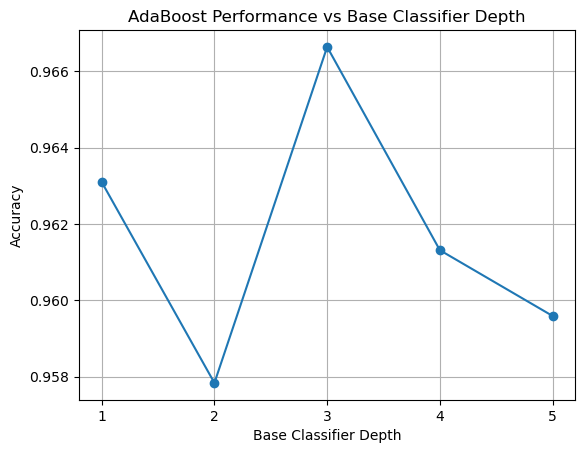

In [ ]:
# Define the depths for the decision trees
depths = range(1, 6)

# Initialize lists to store accuracy scores
accuracy_scores = []

# Iterate over each depth
for depth in depths:
    # Instantiate the AdaBoost classifier with base learner as decision tree of specified depth
    base_estimator = DecisionTreeClassifier(max_depth=depth)
    ada_boost = AdaBoostClassifier(base_estimator=base_estimator)
    
    # Perform 10-fold cross-validation and compute the mean accuracy score
    scores = cross_val_score(ada_boost, X, y, cv=10)
    accuracy_scores.append(scores.mean())

# Plot the accuracy scores against base classifier depth
plt.plot(depths, accuracy_scores, marker='o')
plt.xlabel('Base Classifier Depth')
plt.ylabel('Accuracy')
plt.title('AdaBoost Performance vs Base Classifier Depth')
plt.xticks(depths)
plt.grid(True)
plt.show()